In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Data


In [2]:
X_test = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/X_test.csv', sep=',', index_col=0)
X_train = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/X_train.csv', sep=',', index_col=0)
y_test = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/y_test.csv', sep=',', index_col=0)
y_train = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/y_train.csv', sep=',', index_col=0)

In [3]:
for col in X_train.columns:
    X_train[col] = X_train[col].fillna(method='ffill')

### Model

In [4]:
model = RandomForestRegressor(n_jobs=-1)

In [5]:
model.fit(X_train.values, y_train.values)

C:\Users\dtulomba\AppData\Local\Temp/ipykernel_23480/1603509010.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train.values, y_train.values)


RandomForestRegressor(n_jobs=-1)

In [6]:
y_preds = model.predict(X_test.values)

### Evaluate

In [7]:
def rmse_score(y_true, y_pred):
    """ Calculate the Root Mean Squared Error """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [8]:
def score(y_true, y_pred):
    rmse = rmse_score(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")

In [9]:
score(y_test.values, y_preds)

RMSE: 3.3113775152061193
R2: 0.6074297267221208


### Plot

In [10]:
def plot_preds(y_true, y_preds):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y_true, y_preds, alpha=0.1)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    ax.set_ylim([15, 65])
    ax.set_xlim([15, 65])
    ax.plot([15, 65], [15, 65], color='tab:red', ls='dashed')

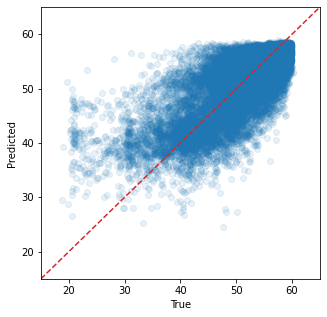

In [11]:
plot_preds(y_test.values, y_preds)

### Save

In [12]:
with open('models/first_model_nodata_temp.pkl', 'wb') as fp:
    pickle.dump(model, fp)

In [13]:
pd.Series(index=y_test.index, data=y_preds).reset_index().to_csv('y_preds_nodatatemp.csv', index=False)

In [14]:
y_preds_series = pd.Series(y_preds)

In [17]:
y_preds_series

0        51.053621
1        52.284408
2        52.687679
3        51.791643
4        51.448269
           ...    
52201    39.080967
52202    39.304010
52203    40.965941
52204    38.246105
52205    38.601386
Length: 52206, dtype: float64

In [15]:
sub = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/submission_template.csv', parse_dates=True, index_col=0)

In [18]:
sub.head(2)

,1_Gear oil temperature (°C)
# Date and time,
2020-06-16 08:20:00,NaN
2020-06-16 08:30:00,NaN


In [16]:
submission_df_first_model = (
   y_preds_series
   .rename('1_Gear oil temperature (°C)')
   .reindex(sub.index)
   .fillna(y_preds_series.mean())
   .to_frame()
)

In [19]:
submission_df_first_model.head(2)

,1_Gear oil temperature (°C)
# Date and time,
2020-06-16 08:20:00,52.918765
2020-06-16 08:30:00,52.918765


In [20]:
submission_df_first_model.to_csv("submission_df_first_model.csv")